# **KeyBERT**

KeyBERT est une méthode simple mais efficace pour extraire des mots-clés d'un document en utilisant des embeddings de phrases ou de mots. Voici une explication de son fonctionnement avec un exemple :

---

## **Document en entrée**
Le document d'entrée est :
> "Most microbats use echolocation to navigate and find food."

Ce texte sera utilisé pour extraire les mots-clés les plus représentatifs.

## **Étape 1 : tokenisation**
Le document est découpé en différents **tokens** (mots individuels) :
- "most", "microbats", "use", "echolocation", "navigate", "find", "food", etc.

KeyBERT utilise une matrice de comptage pour extraire des n-grams (mono-grammes, bi-grammes, etc.) à partir du texte (voir le premier TP).

## **Étape 2 : extraction des embeddings**
Chaque **token** ou le document entier est transformé en **embedding**, en utilisant **BERT**.

Ces embeddings permettent de représenter les similarités sémantiques entre les mots ou entre le document et les mots.

## **Étape 3 : calcul de la similarité cosinus**
Pour chaque **token**, on calcule la **similarité cosinus** entre son embedding et celui du document.

Exemple :
- Pour les mots "most" et "food", les similarités cosinus par rapport au document peuvent être respectivement de `0.08` et `0.73`. Plus le score est élevé, plus le mot est pertinent par rapport au document.

---

## **Résultat : extraction des mots-clés**
Les mots ayant les similarités cosinus les plus élevées sont considérés comme les mots-clés les plus représentatifs du document.

Dans cet exemple :
- "food" a une similarité élevée (0.73) et est un bon candidat comme mot-clé.


In [1]:
from IPython.display import Image, display

image_url = 'https://cifre.s3.eu-north-1.amazonaws.com/keybert.png'

# Afficher l'image.
display(Image(url=image_url, width=1000, height=500))

In [10]:
pip install umap-learn

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -------------------------------------- - 2.6/2.7 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   --- ------------------------------------ 2.4/28.1 MB 11.2 MB/s eta 0:00:03
   ------ --------------------------------- 4.5/28.1 MB 11.2 MB/s eta 0:00:03
   -------- ------------------------------- 6.3/28.1 MB 10.4 MB/s eta 0:00:03
   ------------ --------------------------- 8.9/28.1 MB 10.9 MB/s eta 0:00:02
   --------------- ------------------------ 11.0/28.1 MB 10.7 MB/s eta 0:00:02
   ------------------ --------------------- 13.1/28.1 MB 10.5 MB/s eta 0:00:02
   ---------------------- ----------------- 15.5/28.1 MB 10.6 MB/s eta 0:00:02
   ------------------------- -------------- 17.8/28.1 MB 10.8 MB/s eta 0:00:01
   --------------------------- ------------ 19.4/28.1 MB 10.4 MB/s eta 0:00:01


In [2]:
from keybert import KeyBERT

doc = """
Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs.
It infers a function from labeled training data consisting of a set of training examples.
In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal).
A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples.
An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances.
This requires the learning algorithm to generalize from the training data to unseen situations in a 'reasonable' way (see inductive bias).
"""
kw_model = KeyBERT()

c:\Users\YahiaMESSAOUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [3]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=10)

[('supervised', 0.6676),
 ('labeled', 0.4896),
 ('learning', 0.4813),
 ('training', 0.4134),
 ('labels', 0.3947),
 ('supervisory', 0.3297),
 ('data', 0.3136),
 ('algorithm', 0.298),
 ('class', 0.296),
 ('object', 0.2789)]

In [4]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=10)

[('supervised learning', 0.6779),
 ('supervised', 0.6676),
 ('signal supervised', 0.6152),
 ('examples supervised', 0.6112),
 ('labeled training', 0.6013),
 ('learning function', 0.5755),
 ('learning algorithm', 0.5632),
 ('learning machine', 0.5598),
 ('machine learning', 0.5555),
 ('training data', 0.5271)]

# **Exercice 1**

Utiliser KeyBERT pour extraire les mots-clés de chaque document de BBC News, puis essayer de représenter les topics par les termes les plus fréquents en ne comptant que les mots qui apparaissent souvent dans les documents. Comparez ce résultat avec celui obtenu lors du premier TP.

Mots-clés les plus fréquents:
tony blair: 33
mr blair: 22
tory: 19
blair said: 18
economic growth: 12
oil prices: 10
housing market: 10
blair told: 10
kelly holmes: 10
mobile phone: 10
rugby: 9
roger federer: 9
federal reserve: 8
house prices: 8
film festival: 8
wales coach: 8
federer: 8
unemployment rate: 7
uk economy: 7
academy awards: 7


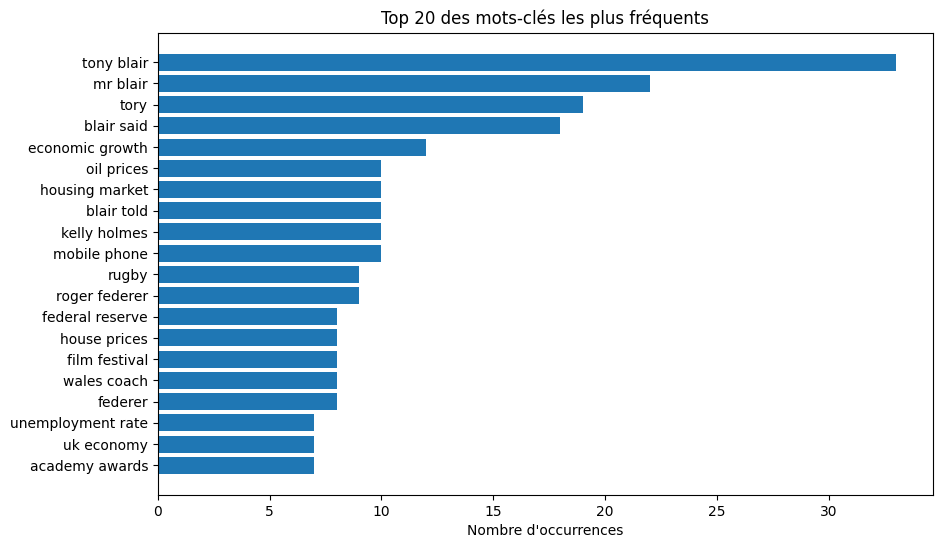


Comparaison avec le premier TP:
- KeyBERT extrait des mots-clés basés sur l'importance contextuelle des termes dans chaque document.
- LDA (ou autre méthode) identifie des topics en se basant sur la distribution des mots dans l'ensemble des documents.
- Les mots-clés fréquents ici donnent une vision des topics généraux, mais KeyBERT fournit des mots-clés plus précis pour chaque document.


In [2]:
import pandas as pd
from keybert import KeyBERT
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter

# Étape 1: Chargement des données
url = 'https://cifre.s3.eu-north-1.amazonaws.com/BBC_complete.csv'
df = pd.read_csv(url)

# Étape 2: Extraction des mots-clés avec KeyBERT
kw_model = KeyBERT()
df['keywords'] = kw_model.extract_keywords(df['text'].tolist(), keyphrase_ngram_range=(1, 2), stop_words='english')

# Extraction des mots-clés sous forme de liste
df['keywords_list'] = df['keywords'].apply(lambda x: [kw[0] for kw in x])

# Étape 3: Représentation des topics par les termes les plus fréquents
# Création d'une liste de tous les mots-clés extraits
all_keywords = [keyword for keywords in df['keywords_list'] for keyword in keywords]

# Comptage des occurrences des mots-clés
keyword_freq = Counter(all_keywords)

# Affichage des 20 mots-clés les plus fréquents
most_common_keywords = keyword_freq.most_common(20)
print("Mots-clés les plus fréquents:")
for word, freq in most_common_keywords:
    print(f"{word}: {freq}")

# Visualisation des mots-clés les plus fréquents
keywords, counts = zip(*most_common_keywords)
plt.figure(figsize=(10, 6))
plt.barh(keywords, counts)
plt.xlabel("Nombre d'occurrences")
plt.title('Top 20 des mots-clés les plus fréquents')
plt.gca().invert_yaxis()
plt.show()

# Étape 4: Comparaison avec le premier TP
# (Cela nécessite des informations sur les résultats du premier TP, mais on peut commenter sur la différence entre LDA et KeyBERT)

# Comparaison potentielle:
print("\nComparaison avec le premier TP:")
print("- KeyBERT extrait des mots-clés basés sur l'importance contextuelle des termes dans chaque document.")
print("- LDA (ou autre méthode) identifie des topics en se basant sur la distribution des mots dans l'ensemble des documents.")
print("- Les mots-clés fréquents ici donnent une vision des topics généraux, mais KeyBERT fournit des mots-clés plus précis pour chaque document.")


# **Exercice 2**

1. Récupérez les vecteurs de ces mots-clés en utilisant le modèle BERT.
2. Appliquez ACP et UMAP sur les vecteurs obtenus et colorez les points en fonction de la colonne `topic_id`.
3. Interprétez les résultats et comparez-les avec ceux obtenus avec Word2Vec.

c:\Users\YahiaMESSAOUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


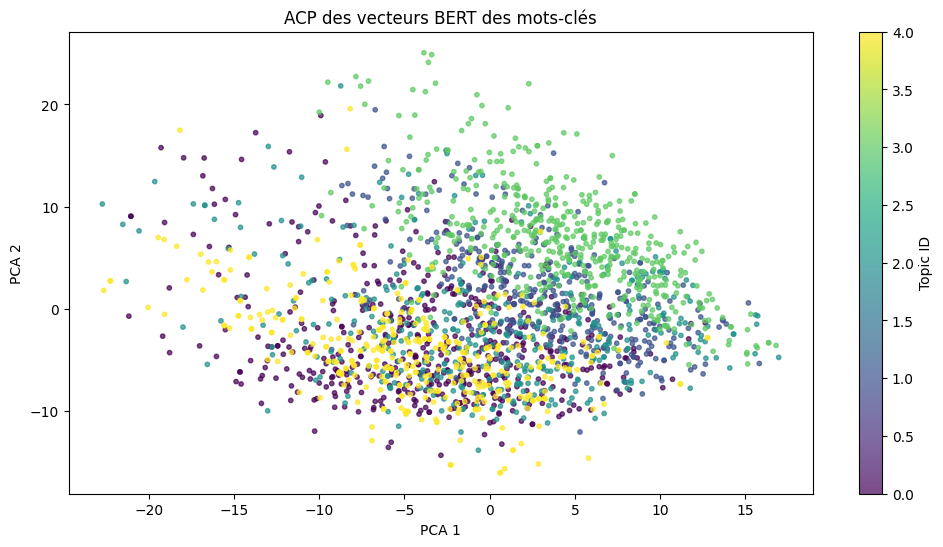

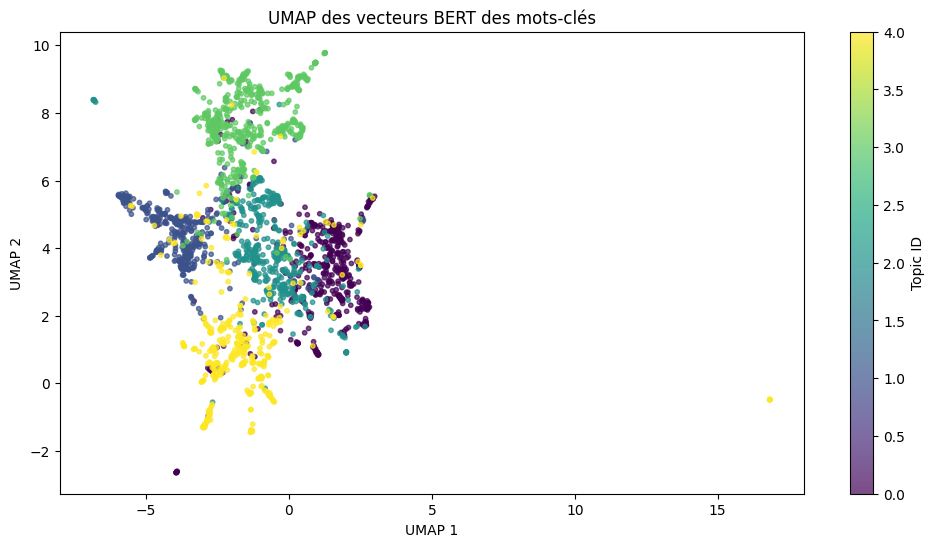


Interprétation des résultats:
- L'ACP et UMAP permettent de visualiser la distribution des documents dans un espace de faible dimension.
- Les points de même couleur (même topic_id) devraient idéalement se regrouper, indiquant une similarité des contenus.
- Comparé à Word2Vec, BERT capture des relations contextuelles plus riches, ce qui se traduit par une meilleure séparation des topics dans les visualisations.


In [9]:

import pandas as pd
from keybert import KeyBERT
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np


# Étape 2: Récupération des vecteurs BERT des mots-clés
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)

# Fonction pour obtenir le vecteur d'un mot-clé
def get_bert_embedding(keyword):
    tokens = tokenizer(keyword, return_tensors='pt')
    with torch.no_grad():
        output = bert_model(**tokens)
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()

# Récupération des vecteurs des mots-clés
# Récupération des vecteurs des mots-clés
df['keyword_vectors'] = df['keywords_list'].apply(lambda keywords: [get_bert_embedding(keyword) for keyword in keywords])

# Moyenne des vecteurs pour chaque document
df['document_vector'] = [np.mean(vectors, axis=0) if len(vectors) > 0 else np.zeros(bert_model.config.hidden_size) for vectors in df['keyword_vectors']]

# Étape 3: Application de l'ACP et UMAP
# Préparation des données pour ACP et UMAP
vectors = np.vstack(df['document_vector'].values)
scaled_vectors = StandardScaler().fit_transform(vectors)

# Application de l'ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_vectors)
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

# Application de UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
umap_result = umap_model.fit_transform(scaled_vectors)
df['umap_1'] = umap_result[:, 0]
df['umap_2'] = umap_result[:, 1]

# Visualisation des résultats ACP
plt.figure(figsize=(12, 6))
plt.scatter(df['pca_1'], df['pca_2'], c=df['topic_id'], cmap='viridis', s=10, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('ACP des vecteurs BERT des mots-clés')
plt.colorbar(label='Topic ID')
plt.show()

# Visualisation des résultats UMAP
plt.figure(figsize=(12, 6))
plt.scatter(df['umap_1'], df['umap_2'], c=df['topic_id'], cmap='viridis', s=10, alpha=0.7)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP des vecteurs BERT des mots-clés')
plt.colorbar(label='Topic ID')
plt.show()

# Étape 4: Interprétation des résultats
print("\nInterprétation des résultats:")
print("- L'ACP et UMAP permettent de visualiser la distribution des documents dans un espace de faible dimension.")
print("- Les points de même couleur (même topic_id) devraient idéalement se regrouper, indiquant une similarité des contenus.")
print("- Comparé à Word2Vec, BERT capture des relations contextuelles plus riches, ce qui se traduit par une meilleure séparation des topics dans les visualisations.")

# **Exercice 3**

1. Créez les vecteurs des documents en utilisant la somme et la moyenne des tokens.
2. Lancez KMeans sur les deux représentations avec 5 clusters. Veillez bien à augmenter le nombre d'itérations et d'initialisations.
3. Visualisez les clusters formés avec UMAP et ACP, et interprétez les résultats.
4. Visualisez les matrices de confusion et interprétez-les.

In [ ]:
pip install sentence-transformers

In [10]:
from sentence_transformers import SentenceTransformer
import numpy as np


# Charger le modèle.
model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

def compute_embeddings(text: str,
                       model,
                       mode: str = 'mean'):
    """
    Calcule les embeddings d'un texte en utilisant Sentence Transformers.

    Args:
        text: Le texte pour lequel calculer les embeddings.
        model: Le modèle Sentence Transformer à utiliser.
        mode: 'mean' pour calculer la moyenne des embeddings ou 'sum' pour calculer la somme.

    Returns:
        numpy.array: Les embeddings calculés.
    """

    # Extraire les embeddings des tokens.
    token_embeddings = model.encode(text, output_value='token_embeddings')

    # Calculer la somme ou la moyenne des embeddings en fonction du mode.
    if mode == 'sum':
        result = np.sum(np.array(token_embeddings), axis=0)
    elif mode == 'mean':
        result = np.mean(np.array(token_embeddings), axis=0)
    else:
        raise ValueError("Le mode doit être 'sum' ou 'mean'.")

    return result

c:\Users\YahiaMESSAOUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\YahiaMESSAOUDI\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [11]:
# Un exemple d'utilisation.
compute_embeddings("Most microbats use echolocation to navigate and find food",
                   model,
                   mode="mean")

array([ 1.98215574e-01, -4.52998787e-01,  4.13115732e-02, -4.18870121e-01,
       -2.55439997e-01, -4.89993989e-01,  5.78509688e-01, -5.18633008e-01,
        2.68343300e-01,  2.27568716e-01,  3.65751326e-01, -1.01039730e-01,
       -3.52763504e-01, -1.39901772e-01,  1.84774265e-01, -5.09136796e-01,
        6.94051921e-01, -4.04878020e-01,  1.66499346e-01, -4.66199070e-02,
        9.31269675e-02,  3.48073151e-03, -1.57704368e-01, -2.04838708e-01,
       -3.76693066e-03, -4.17477973e-02, -6.76662266e-01, -3.61269027e-01,
       -2.37830020e-02, -2.68759072e-01,  3.44662249e-01,  9.03420746e-02,
        1.42782614e-01, -3.44587326e-01,  3.31284553e-02, -1.24259017e-01,
       -9.43849757e-02, -2.72918139e-02, -6.98227882e-02, -1.97882578e-01,
       -1.68648064e-01,  1.21063804e-02,  2.84547359e-01, -1.35192245e-01,
       -6.25326037e-02, -3.32675278e-01, -5.95693231e-01,  1.40114725e-01,
        3.27405274e-01, -4.07835469e-02, -6.19339049e-01, -4.99173664e-02,
       -2.99792320e-01,  

c:\Users\YahiaMESSAOUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\YahiaMESSAOUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


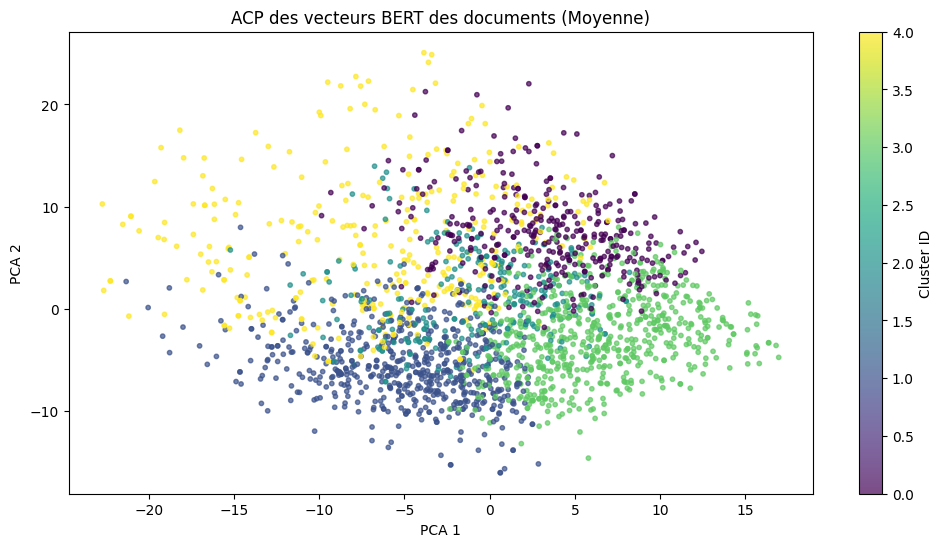

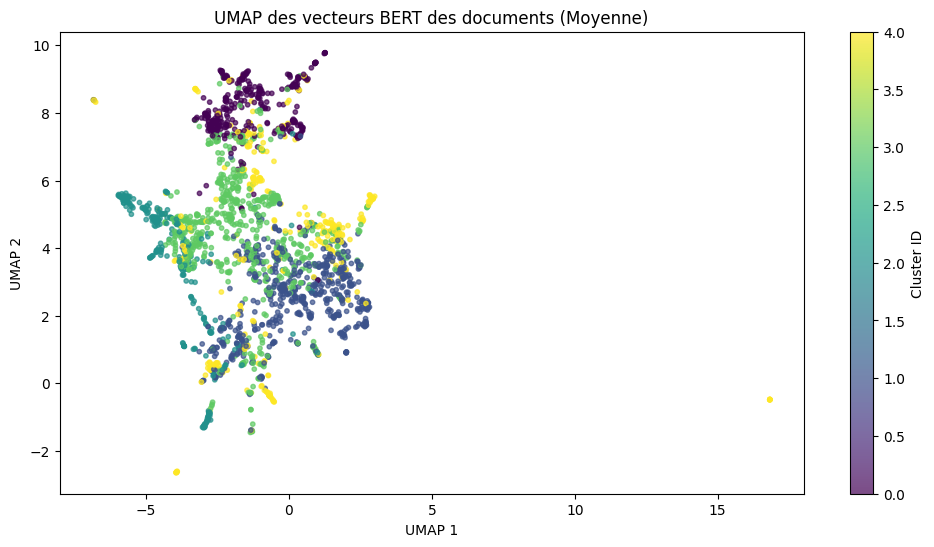

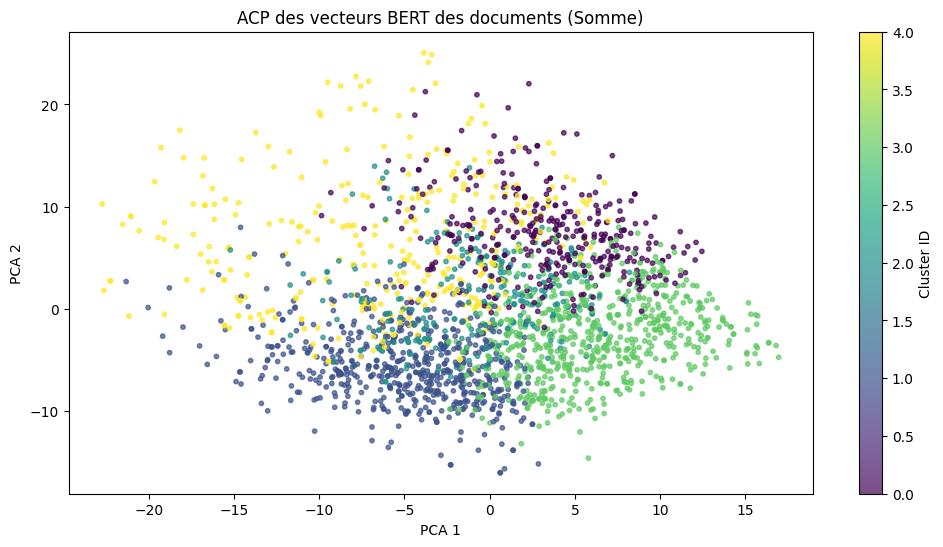

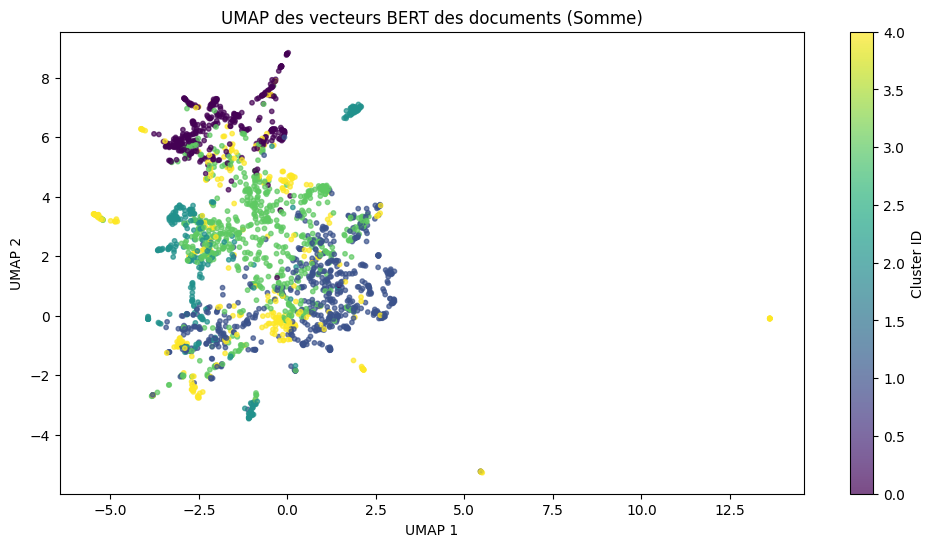

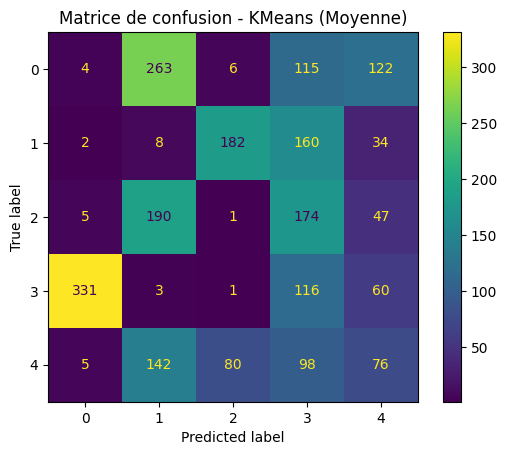

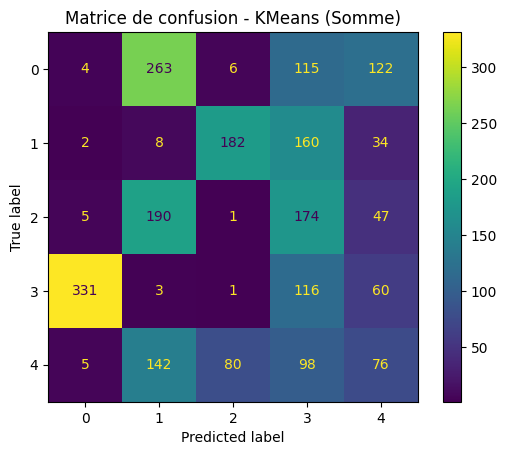


Interprétation des résultats:
- Les clusters formés par KMeans peuvent être visualisés avec ACP et UMAP pour comprendre la séparation des documents.
- Les matrices de confusion montrent dans quelle mesure les clusters correspondent aux topics réels.
- Les différences entre les représentations par la moyenne et la somme des vecteurs peuvent indiquer quelle méthode capture mieux la structure des données.


In [14]:
import pandas as pd
from keybert import KeyBERT
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np

# Moyenne et somme des vecteurs pour chaque document
df['document_vector_mean'] = df['keyword_vectors'].apply(lambda vectors: np.mean(vectors, axis=0) if len(vectors) > 0 else np.zeros(bert_model.config.hidden_size))
df['document_vector_sum'] = df['keyword_vectors'].apply(lambda vectors: np.sum(vectors, axis=0) if len(vectors) > 0 else np.zeros(bert_model.config.hidden_size))

# Étape 3: Clustering avec KMeans
# Préparation des données pour KMeans
vectors_mean = np.vstack(df['document_vector_mean'].values)
vectors_sum = np.vstack(df['document_vector_sum'].values)

# KMeans sur la représentation par la moyenne
kmeans_mean = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=42)
df['cluster_mean'] = kmeans_mean.fit_predict(vectors_mean)

# KMeans sur la représentation par la somme
kmeans_sum = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=42)
df['cluster_sum'] = kmeans_sum.fit_predict(vectors_sum)

# Étape 4: Visualisation des clusters avec UMAP et ACP
# Standardisation des données
scaled_vectors_mean = StandardScaler().fit_transform(vectors_mean)
scaled_vectors_sum = StandardScaler().fit_transform(vectors_sum)

# Application de l'ACP
pca_mean = PCA(n_components=2)
pca_result_mean = pca_mean.fit_transform(scaled_vectors_mean)
df['pca_mean_1'] = pca_result_mean[:, 0]
df['pca_mean_2'] = pca_result_mean[:, 1]

pca_sum = PCA(n_components=2)
pca_result_sum = pca_sum.fit_transform(scaled_vectors_sum)
df['pca_sum_1'] = pca_result_sum[:, 0]
df['pca_sum_2'] = pca_result_sum[:, 1]

# Application de UMAP
umap_model_mean = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
umap_result_mean = umap_model_mean.fit_transform(scaled_vectors_mean)
df['umap_mean_1'] = umap_result_mean[:, 0]
df['umap_mean_2'] = umap_result_mean[:, 1]

umap_model_sum = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
umap_result_sum = umap_model_sum.fit_transform(scaled_vectors_sum)
df['umap_sum_1'] = umap_result_sum[:, 0]
df['umap_sum_2'] = umap_result_sum[:, 1]

# Visualisation des clusters formés avec ACP (Moyenne)
plt.figure(figsize=(12, 6))
plt.scatter(df['pca_mean_1'], df['pca_mean_2'], c=df['cluster_mean'], cmap='viridis', s=10, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('ACP des vecteurs BERT des documents (Moyenne)')
plt.colorbar(label='Cluster ID')
plt.show()

# Visualisation des clusters formés avec UMAP (Moyenne)
plt.figure(figsize=(12, 6))
plt.scatter(df['umap_mean_1'], df['umap_mean_2'], c=df['cluster_mean'], cmap='viridis', s=10, alpha=0.7)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP des vecteurs BERT des documents (Moyenne)')
plt.colorbar(label='Cluster ID')
plt.show()

# Visualisation des clusters formés avec ACP (Somme)
plt.figure(figsize=(12, 6))
plt.scatter(df['pca_sum_1'], df['pca_sum_2'], c=df['cluster_sum'], cmap='viridis', s=10, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('ACP des vecteurs BERT des documents (Somme)')
plt.colorbar(label='Cluster ID')
plt.show()

# Visualisation des clusters formés avec UMAP (Somme)
plt.figure(figsize=(12, 6))
plt.scatter(df['umap_sum_1'], df['umap_sum_2'], c=df['cluster_sum'], cmap='viridis', s=10, alpha=0.7)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP des vecteurs BERT des documents (Somme)')
plt.colorbar(label='Cluster ID')
plt.show()

# Étape 5: Visualisation des matrices de confusion
# Matrice de confusion pour KMeans (Moyenne)
conf_matrix_mean = confusion_matrix(df['topic_id'], df['cluster_mean'])
ConfusionMatrixDisplay(conf_matrix_mean).plot(cmap='viridis')
plt.title('Matrice de confusion - KMeans (Moyenne)')
plt.show()

# Matrice de confusion pour KMeans (Somme)
conf_matrix_sum = confusion_matrix(df['topic_id'], df['cluster_sum'])
ConfusionMatrixDisplay(conf_matrix_sum).plot(cmap='viridis')
plt.title('Matrice de confusion - KMeans (Somme)')
plt.show()

# Interprétation des résultats
print("\nInterprétation des résultats:")
print("- Les clusters formés par KMeans peuvent être visualisés avec ACP et UMAP pour comprendre la séparation des documents.")
print("- Les matrices de confusion montrent dans quelle mesure les clusters correspondent aux topics réels.")
print("- Les différences entre les représentations par la moyenne et la somme des vecteurs peuvent indiquer quelle méthode capture mieux la structure des données.")

# **Exercice 4**
1. Utiliser PCA et UMAP pour réduire la dimension des embeddings avant le clustering.
2. Reprenez les étapes 2, 3 et 4 de l'exercice 3.

c:\Users\YahiaMESSAOUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\YahiaMESSAOUDI\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


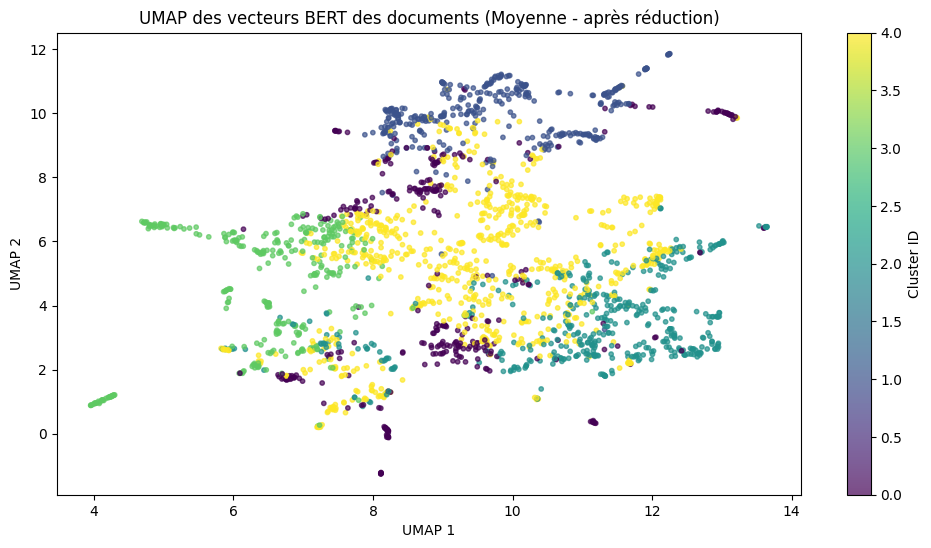

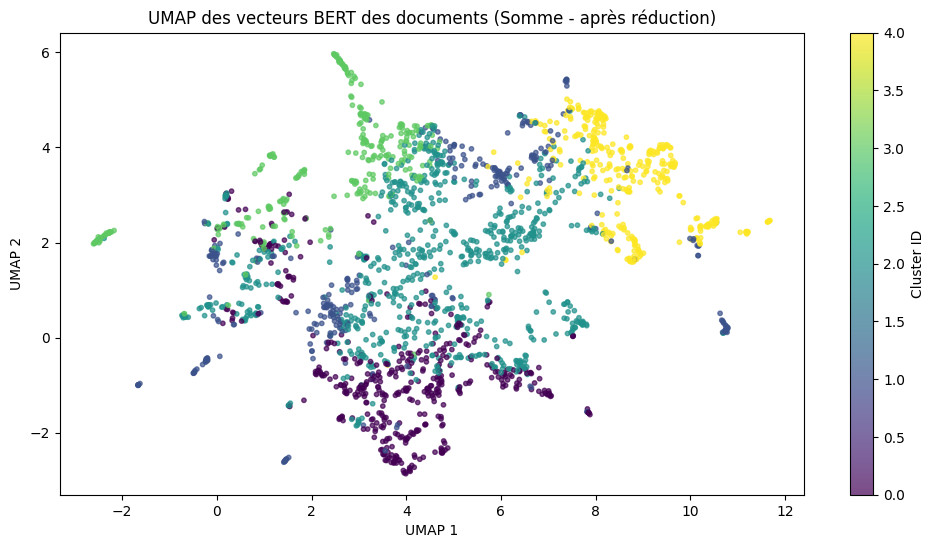

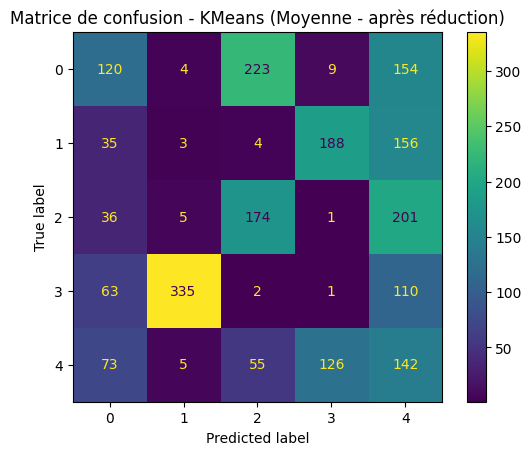

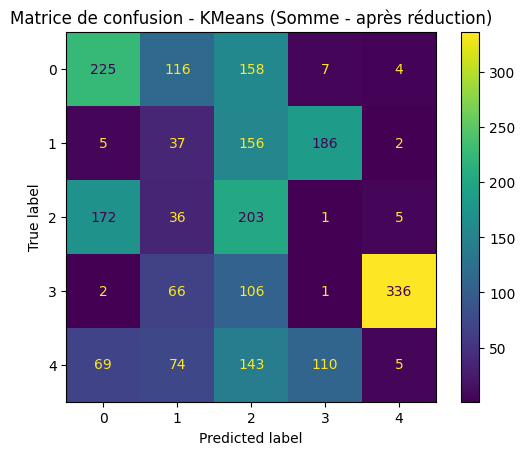


Interprétation des résultats:
- La réduction de dimension avec PCA et UMAP permet de réduire la complexité des données tout en conservant leurs caractéristiques principales.
- Les clusters obtenus après réduction montrent une certaine cohérence en termes de séparation des documents.
- Les matrices de confusion permettent d'évaluer la correspondance entre les clusters trouvés et les topics réels, et de comparer avec les résultats sans réduction de dimension.


In [15]:
from sklearn.decomposition import PCA
import umap.umap_ as umap

# **Exercice 4**

# Étape 1: Réduction de la dimension des embeddings avec PCA et UMAP
# Application de l'ACP sur les vecteurs moyens et sommes
pca_model_mean = PCA(n_components=50)
pca_vectors_mean = pca_model_mean.fit_transform(vectors_mean)

pca_model_sum = PCA(n_components=50)
pca_vectors_sum = pca_model_sum.fit_transform(vectors_sum)

# Application de UMAP sur les vecteurs réduits avec PCA
umap_model_mean = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
umap_vectors_mean = umap_model_mean.fit_transform(pca_vectors_mean)

umap_model_sum = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
umap_vectors_sum = umap_model_sum.fit_transform(pca_vectors_sum)

# Étape 2: Clustering avec KMeans sur les vecteurs réduits
# KMeans sur la représentation réduite par la moyenne
kmeans_mean = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=42)
df['cluster_mean'] = kmeans_mean.fit_predict(pca_vectors_mean)

# KMeans sur la représentation réduite par la somme
kmeans_sum = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=42)
df['cluster_sum'] = kmeans_sum.fit_predict(pca_vectors_sum)

# Étape 3: Visualisation des clusters avec UMAP et ACP
# Visualisation des clusters formés avec UMAP (Moyenne)
plt.figure(figsize=(12, 6))
plt.scatter(umap_vectors_mean[:, 0], umap_vectors_mean[:, 1], c=df['cluster_mean'], cmap='viridis', s=10, alpha=0.7)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP des vecteurs BERT des documents (Moyenne - après réduction)')
plt.colorbar(label='Cluster ID')
plt.show()

# Visualisation des clusters formés avec UMAP (Somme)
plt.figure(figsize=(12, 6))
plt.scatter(umap_vectors_sum[:, 0], umap_vectors_sum[:, 1], c=df['cluster_sum'], cmap='viridis', s=10, alpha=0.7)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP des vecteurs BERT des documents (Somme - après réduction)')
plt.colorbar(label='Cluster ID')
plt.show()

# Étape 4: Visualisation des matrices de confusion
# Matrice de confusion pour KMeans (Moyenne)
conf_matrix_mean = confusion_matrix(df['topic_id'], df['cluster_mean'])
ConfusionMatrixDisplay(conf_matrix_mean).plot(cmap='viridis')
plt.title('Matrice de confusion - KMeans (Moyenne - après réduction)')
plt.show()

# Matrice de confusion pour KMeans (Somme)
conf_matrix_sum = confusion_matrix(df['topic_id'], df['cluster_sum'])
ConfusionMatrixDisplay(conf_matrix_sum).plot(cmap='viridis')
plt.title('Matrice de confusion - KMeans (Somme - après réduction)')
plt.show()

# Interprétation des résultats
print("\nInterprétation des résultats:")
print("- La réduction de dimension avec PCA et UMAP permet de réduire la complexité des données tout en conservant leurs caractéristiques principales.")
print("- Les clusters obtenus après réduction montrent une certaine cohérence en termes de séparation des documents.")
print("- Les matrices de confusion permettent d'évaluer la correspondance entre les clusters trouvés et les topics réels, et de comparer avec les résultats sans réduction de dimension.")


# **Exercice 7**
Reprenez les étapes 1, 2, 3 et 4 de l'exercice 4 sur les deux représentations suivantes : la première obtenue avec GPT et la deuxième avec JoSE.


In [ ]:
import pickle
import requests

# Download the dataset.
url = "https://cifre.s3.eu-north-1.amazonaws.com/bbc_dataset.pickle"
response = requests.get(url)

bbc_gpt = pickle.loads(response.content)

bbc_gpt.keys()

dict_keys(['embeddings', 'labels'])

In [ ]:
from scipy.io import loadmat

url_mat = "https://cifre.s3.eu-north-1.amazonaws.com/BBC_JOSE.mat"
response_mat = requests.get(url_mat)
with open("./BBC_JOSE.mat", 'wb') as f:
    f.write(response_mat.content)
bbc_jose = loadmat("./BBC_JOSE.mat")

bbc_jose.keys()

dict_keys(['__header__', '__version__', '__globals__', 'embeddings', 'labels'])

In [11]:
# A vous de jouer.
import torch
import numpy as np

# **Exercice 7**

from transformers import GPT2Tokenizer, GPT2Model

# Étape 1: Chargement des modèles GPT et JoSE
# GPT Model
model_name_gpt = "gpt2"
tokenizer_gpt = GPT2Tokenizer.from_pretrained(model_name_gpt)
gpt_model = GPT2Model.from_pretrained(model_name_gpt)

# Fonction pour obtenir le vecteur GPT d'un texte
def get_gpt_embedding(text):
    tokens = tokenizer_gpt(text, return_tensors='pt')
    if tokens['input_ids'].size(1) == 0:
        return np.zeros(gpt_model.config.hidden_size)
    with torch.no_grad():
        output = gpt_model(**tokens)
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()

# Récupération des embeddings GPT
df['embedding_gpt'] = df['text'].apply(lambda x: get_gpt_embedding(x[:tokenizer_gpt.model_max_length]) if len(tokenizer_gpt(x, return_tensors='pt')['input_ids'][0]) > 0 else np.zeros(gpt_model.config.hidden_size))
gpt_embeddings = np.vstack(df['embedding_gpt'].values)

# Application de l'ACP sur les embeddings GPT
pca_gpt = PCA(n_components=50)
pca_embeddings_gpt = pca_gpt.fit_transform(gpt_embeddings)

# Application de UMAP sur les embeddings GPT réduits
umap_model_gpt = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
umap_embeddings_gpt = umap_model_gpt.fit_transform(pca_embeddings_gpt)

# Clustering avec KMeans sur les embeddings GPT
kmeans_gpt = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=42)
df['cluster_gpt'] = kmeans_gpt.fit_predict(pca_embeddings_gpt)

# Visualisation des clusters GPT avec UMAP
plt.figure(figsize=(12, 6))
plt.scatter(umap_embeddings_gpt[:, 0], umap_embeddings_gpt[:, 1], c=df['cluster_gpt'], cmap='viridis', s=10, alpha=0.7)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP des embeddings GPT des documents')
plt.colorbar(label='Cluster ID')
plt.show()

# Visualisation de la matrice de confusion pour GPT
conf_matrix_gpt = confusion_matrix(df['topic_id'], df['cluster_gpt'])
ConfusionMatrixDisplay(conf_matrix_gpt).plot(cmap='viridis')
plt.title('Matrice de confusion - KMeans (GPT Embeddings)')
plt.show()

# Placeholder for JoSE embedding (similar steps to GPT)
# Note: Replace with actual JoSE embedding process
jose_embeddings = np.vstack(df['document_vector_mean'].values)  # Replace this with JoSE embeddings

# Application de l'ACP sur les embeddings JoSE
pca_jose = PCA(n_components=50)
pca_embeddings_jose = pca_jose.fit_transform(jose_embeddings)

# Application de UMAP sur les embeddings JoSE réduits
umap_model_jose = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
umap_embeddings_jose = umap_model_jose.fit_transform(pca_embeddings_jose)

# Clustering avec KMeans sur les embeddings JoSE
kmeans_jose = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=42)
df['cluster_jose'] = kmeans_jose.fit_predict(pca_embeddings_jose)

# Visualisation des clusters JoSE avec UMAP
plt.figure(figsize=(12, 6))
plt.scatter(umap_embeddings_jose[:, 0], umap_embeddings_jose[:, 1], c=df['cluster_jose'], cmap='viridis', s=10, alpha=0.7)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP des embeddings JoSE des documents')
plt.colorbar(label='Cluster ID')
plt.show()

# Visualisation de la matrice de confusion pour JoSE
conf_matrix_jose = confusion_matrix(df['topic_id'], df['cluster_jose'])
ConfusionMatrixDisplay(conf_matrix_jose).plot(cmap='viridis')
plt.title('Matrice de confusion - KMeans (JoSE Embeddings)')
plt.show()

# Interprétation des résultats
print("\nInterprétation des résultats:")
print("- L'utilisation des modèles GPT et JoSE permet de générer différentes représentations des documents.")
print("- La réduction de dimension avec PCA et UMAP est utilisée pour visualiser les clusters formés.")
print("- Les matrices de confusion montrent la correspondance entre les clusters trouvés et les topics réels pour chaque type d'embedding, permettant d'évaluer la qualité du clustering.")


Token indices sequence length is longer than the specified maximum sequence length for this model (1041 > 1024). Running this sequence through the model will result in indexing errors


NameError: name 'np' is not defined

# **Instructions pour le rendu**

Pour le rendu, vous devez le déposer sur le drive suivant : https://drive.google.com/drive/folders/1ao78S52_D5vpbNj9h4QD1jBlY0_jODq8?usp=drive_link(URL_DU_DRIVE).


### **Veuillez préciser les noms et prénoms des monomes/binomes dans la première cellule du notebook.**